<a href="https://colab.research.google.com/github/ChunxiaqiuY/BA865-Advanced-Analytics_Team-Great/blob/main/Copy_of_BA865_TeamReal_FakeJobAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BA865 Team Real - Fake Job Analyise
Members: Yipeng(Caroline) Guo: ypguo@bu.edu

Yilun(Allen) Wang: yilun830@bu.edu

Niming(Danny) Wang: wang2021@bu.edu

Mochi Zhang: zhangmc@bu.edu

Chunxiaqiu(Tommy) Yang: chunqiu@bu.edu



#Business Problem & Motivation
The problem motivates us is the possibility of identifying fake job recruiting news


1.   Recognition of fake job posting by deep learning (NN) technologies, including transfering text into code, MLP model trainging and testing.
2.   Exploration of creating fraud testing system to ensure safe hiring environment.

The rational behind this is that, with the growth of unemployed and job gaps due to economic stres and Covid impcat, there are multiple websites or Apps that provide job recruting, applying, and other posting. However, scammers may take advantage of this and post fake job information to gather applicants' personal information and privacy. The project aims to distinguish real and fake job recruiting news.






##Dataset

https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

The Employment Scam Aegean Dataset was explicitly granted and acknowledged by the Laboratory of Information & Communication System Security, The University of the Aegean (http://emscad.samos.aegean.gr/). With thousands of hiring news collected with their detailed description, it allows us to dig deeper than we would imagine. This dataset contains 18K posting entries with 18 features captured, out of which about 800 are fake. It consists of both textual information and meta-information about the jobs.

In [ ]:
! pip install mlxtend
! pip install scikit-plot
! pip install newspaper3k
! pip install -U spacy
! pip install -U textacy
! pip install wordcloud
! pip install emoji
! pip install nltk
! pip install scikit-plot
! pip install spacytextblob
! pip install afinn
! pip install pysrt
! pip install textdescriptives
! pip install tokenwiser

     |████████████████████████████████| 211 kB 4.0 MB/s 
     |████████████████████████████████| 87 kB 3.9 MB/s 
     |████████████████████████████████| 7.4 MB 35.5 MB/s 
     |████████████████████████████████| 81 kB 7.1 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=8a906c835f37869bd607b96ed58c53bb3681e4d7ead774db04ed3398e7635a5d
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=9bff01e495f48ca1788434f225a97c2b6ac0ca564a2e7c6bc9a66a597e59a859
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=7f02c8ab58c146b84897d4ab30b0c7db46e2ca3bfe84366923b92cb44d419952
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [ ]:
# imports
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
import os
import numpy as np
from PIL import Image
import uuid
import pandas as pd
import cv2   
import random
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics 
from sklearn.datasets import make_blobs
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

#Principal component analysis (PCA) for reducing the dimensionality of data
from sklearn.decomposition import PCA
from sklearn import metrics 
import scikitplot as skplt

# color maps
from matplotlib import cm

# some "fun" packages
from wordcloud import WordCloud
import emoji
import re

# text imports
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import json

# text imports
from spacy import cli
import textdescriptives as td
import tokenwiser
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import gensim
from afinn import Afinn
from newspaper import Article
import warnings
warnings.filterwarnings("ignore")

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

#for k-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

# for keras
from tensorflow.keras import utils

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Read the dataset from the github repo
url = "https://raw.githubusercontent.com/ChunxiaqiuY/BA865-Advanced-Analytics_Team-Great/main/fake_job_postings.csv"
df = pd.read_csv(url)
#Basic understanding of the data, sample data
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
15500,15502,Care Giver,"GB, LAN, Preston",NaN,NaN,NaN,CAREGiver Home Instead Senior Care provides hi...,NaN,NaN,0,1,0,Part-time,NaN,NaN,Hospital & Health Care,Health Care Provider,0
9573,9575,English Teacher Abroad,"US, WI, Stevens Point",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,0
14087,14089,Factory Integration Software Team Leader,"NL, ,",NaN,NaN,ClarusApex is an international recruiting comp...,Is software development your passion and would...,"Requirements:MSc, PDEng or PhD in computer sci...",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
15694,15696,Quality Assurance Manager,"US, CA, Los Angeles",NaN,NaN,We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,NaN,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
13881,13883,Digital Marketing Intern,"US, AZ, Phoenix",Marketing,NaN,Yazamo is a rapidly growing digital lifecycle ...,Attention: This is an unpaid Internship positi...,Content writing for blog and e-books.Study and...,"Experience contributing to, implementing, and ...",0,1,1,Part-time,Internship,Associate Degree,Marketing and Advertising,Marketing,0


In [ ]:
##Check missing value in each category
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15011
company_profile         3308
description                1
requirements            2695
benefits                7209
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8104
industry                4902
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17879 non-null  int64 
 1   title                17879 non-null  object
 2   location             17533 non-null  object
 3   department           6332 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14571 non-null  object
 6   description          17878 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17879 non-null  int64 
 10  has_company_logo     17879 non-null  int64 
 11  has_questions        17879 non-null  int64 
 12  employment_type      14408 non-null  object
 13  required_experience  10829 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

##Preprocess & Data Cleaning

In [ ]:
# Unknown for missing location
df.location = df.location.fillna('unknown')
# unknown for missing department
df.department = df.department.fillna('unknown')
# fill average for missing salary_range
job_salary = df.copy()
salary_temp = job_salary.salary_range.dropna()
ranges = []
for i in salary_temp:
  try:
    ranges.append(int(i.split("-")[0]))
    ranges.append(int(i.split("-")[1]))
  except:
    ranges.append(0)
np.asarray(ranges)
average_salary = np.average(ranges)
df.salary_range = df.salary_range.fillna('average_salary')
# Unknown for missing company_profile
df['company_profile'] = df['company_profile'].fillna('unknown')
# Unknown for missing description
df['description'] = df['description'].fillna('unknown')
# Unknown for missing requirements
df['requirements'] = df['requirements'].fillna('unknown')
# Unknown for missing employment, then replace the category value to numeric 
df['employment_type'] = df['employment_type'].fillna('unknown')
df['employment_type'].replace(['Full-time', 'Part-time','Contract', 'Temporary', 'Other', 'unknown'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
# Unknown for missing required_experience, then replace the category value to numeric 
df['required_experience'] = df['required_experience'].fillna('unknown')
df['required_experience'].replace(['Not Applicable', 'Mid-Senior level','Associate', 'Entry level', 'Executive', 'Director', 'Internship',
                          'unknown'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
# Unknown for missing benefits
df['benefits'] = df['benefits'].fillna('unknown')
# Unknown for missing required_education
df['required_education'] = df['required_education'].fillna('unknown')
df_re = pd.get_dummies(df, columns=['required_education'])
# Unknown for missing industry
df['industry'] = df['industry'].fillna('unknown')
df_industry = pd.get_dummies(df, columns=['industry'])
# Unknown for missing function
df['function'] = df['function'].fillna('unknown')
df_function = pd.get_dummies(df, columns=['function'])
required_experience_c = utils.to_categorical(df['required_experience'])
employment_type_c = utils.to_categorical(df['employment_type'])


In [ ]:
##Double check all missing value are properly handled
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
#Make a copy of the orginal df, use job id as index 
job = df.copy()
job.index = job['job_id']
del job['job_id']

In [ ]:
# Let's shuffle things... 
shuffled_indices= np.arange(job.shape[0])
np.random.shuffle(shuffled_indices)

text_info = (job.title + job.location + job['company_profile'] + job.description + job.requirements + job. benefits).to_numpy()
label = np.where(job['fraudulent']=='fraudulent',1,0)

print(text_info)
text_info = text_info[shuffled_indices]
label = label[shuffled_indices]
print(text_info)

["Customer Service - Cloud Video ProductionNZ, , Auckland90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including P

In [ ]:
text_info.shape

(17879,)

##TextVectorization() Layer

In [ ]:
import tensorflow as tf
import string
import re
from tensorflow import keras

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor) # We convert upper case characters to lowercase.
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "") # We find and remove punctuation.
  
def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor) # By default the separator is white space.
 
text_vectorization = keras.layers.TextVectorization(
    max_tokens=1000,
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

##because the limit of ram, we can only choose the random 1500 rows 
dataset = text_info[:1500]
text_vectorization.adapt(dataset)
text_vectorization.get_vocabulary()

In [ ]:
processed_text = text_vectorization(dataset)

In [ ]:
one_hot = tf.one_hot(processed_text, depth=1000)

In [ ]:
# processed_text = text_vectorization(text_info)
# one_hot = tf.one_hot(processed_text, depth=1000) # we one-hot encode those, so it becomes a length x1000 vector.

# print(one_hot.shape)

##EDA

In [ ]:
####Sort the location? company logo?

In [ ]:
##

In [ ]:
# tokenize the text
cv = CountVectorizer(max_features=1000)
dtm = cv.fit_transform(text_info).toarray()

In [ ]:
# make a dataset for the model
df2 = pd.DataFrame(dtm, columns=cv.get_feature_names_out())


In [ ]:
df2.shape

In [ ]:
17879*0.7

In [ ]:
df2.sample(5)

In [ ]:
# df2[numeric] = job[numeric]

In [ ]:
# df2.dropna(inplace=True)

In [ ]:
try_1 = df2.to_numpy()

##Spacy its like another pre-trained model, discuss to leave or del

In [ ]:
# model = "en_core_web_lg" #md
# cli.download(model)
# nlp = spacy.load(model)

In [ ]:
# nlp.pipe_names

In [ ]:
# #process the text
# EXCL = ['tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
# docs = list(nlp.pipe(text_info[0:1000], disable=EXCL))

In [ ]:
# #Get the vectors
# dv = [doc.vector for doc in docs]
# dv = np.array(dv)
# dv.shape

In [ ]:
# goal = pd.DataFrame(dv, index=job.index, columns=range(0,300))

In [ ]:
# goal.head()

In [ ]:
# job.head()

In [ ]:
# job['required_experience'].unique()

In [ ]:
# numeric = ['telecommuting', 'has_company_logo','has_questions']

In [ ]:
# goal[numeric] = job[numeric]

In [ ]:
# goal.head()

In [ ]:
# #Utilize uMAP for Dimension reduction 
# umap = UMAP(random_state=865)
# embeds = umap.fit_transform(goal)

In [ ]:
# embeds.shape

##NN

In [ ]:
label = label[:1000]

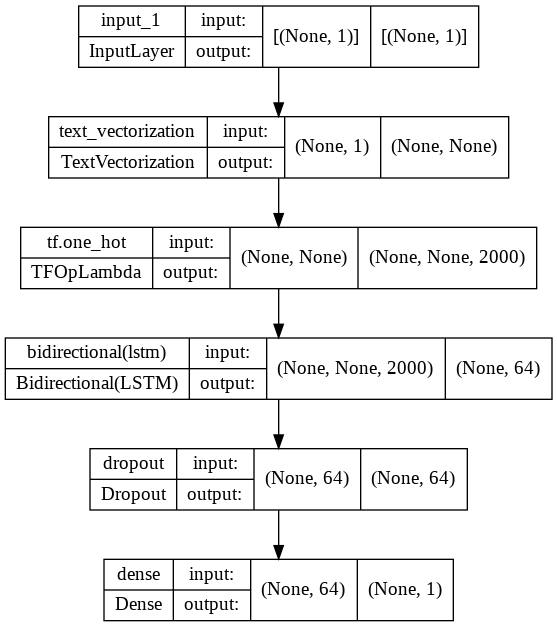

In [ ]:
from keras import layers
def build_model():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    one_hot = tf.one_hot(processing, depth=2000) # we one-hot encode those, so it becomes a length x2000 vector.
    x = layers.Bidirectional(layers.LSTM(32))(one_hot)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs,outputs)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model = build_model()

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
data_train = dataset[:700]
labels_train = label[:700]
data_test = text_info[700:]
labels_test = label[700:]

In [ ]:
k = 4
num_validation_samples = len(data_train) // k
num_epochs = 25
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

##RNN for Text. Transformer /w Multi-Head Attention Layer*

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
  
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs): # Dense dim is how many nodes in the dense layer projection. # Embed dimension is dim of embeddings.
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)
  
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

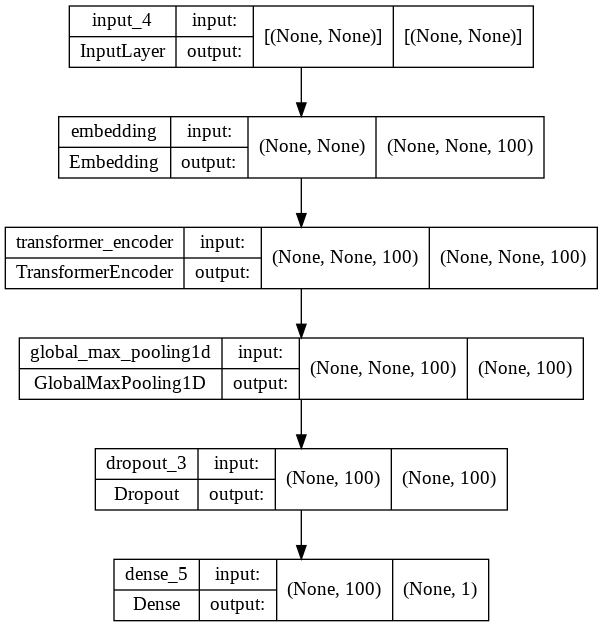

In [ ]:
vocabulary = text_vectorization.get_vocabulary()
processed_text = text_vectorization(dataset)

vocab_size = len(vocabulary)
embed_dim = 100
num_heads = 2
dense_dim = 32 # How many dense nodes in the transformer Dense layer

def build_transformer():

    inputs = keras.Input(shape=(None,), dtype="int64")

    # This model will learn its own custom embedding layer.
    x = layers.Embedding(vocab_size, embed_dim)(inputs)
    x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    return model

model_transformer = build_transformer()
keras.utils.plot_model(model_transformer, show_shapes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/Shareddrives/BA865 Advanced Analytics/Dataset/convnet_from_scratch.keras/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
model_transformer = build_transformer()

history = model_transformer.fit(processed_text[:700], labels_train, validation_split=0.2, batch_size=1,epochs=20, callbacks=callbacks)

Mounted at /content/drive
Epoch 1/20
560/560 [==============================] - 109s 189ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 3.7043e-10 - val_accuracy: 1.0000
Epoch 2/20
560/560 [==============================] - 103s 184ms/step - loss: 5.5478e-09 - accuracy: 1.0000 - val_loss: 7.6874e-11 - val_accuracy: 1.0000
Epoch 3/20
560/560 [==============================] - 102s 182ms/step - loss: 6.4123e-10 - accuracy: 1.0000 - val_loss: 4.2910e-11 - val_accuracy: 1.0000
Epoch 4/20
560/560 [==============================] - 103s 185ms/step - loss: 2.7895e-10 - accuracy: 1.0000 - val_loss: 3.0515e-11 - val_accuracy: 1.0000
Epoch 5/20
560/560 [==============================] - 104s 185ms/step - loss: 2.2128e-10 - accuracy: 1.0000 - val_loss: 2.6446e-11 - val_accuracy: 1.0000
Epoch 6/20
560/560 [==============================] - 103s 185ms/step - loss: 8.3164e-10 - accuracy: 1.0000 - val_loss: 2.0709e-11 - val_accuracy: 1.0000
Epoch 7/20
560/560 [==============================] - 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.plot(history.history['accuracy'],c="r",linestyle="--")
plt.plot(history.history['val_accuracy'],c="b",linestyle="--")
plt.legend(['Training Loss','Validation Loss','Training Acc','Validation Acc'])
plt.show()

model = build_transformer()
model.load_weights("transformer_encoder.keras")
print(f"Test acc: {model.evaluate(processed_text[700:],labels_test)[1]:.3f}")

##Pre-trained model - embeddings

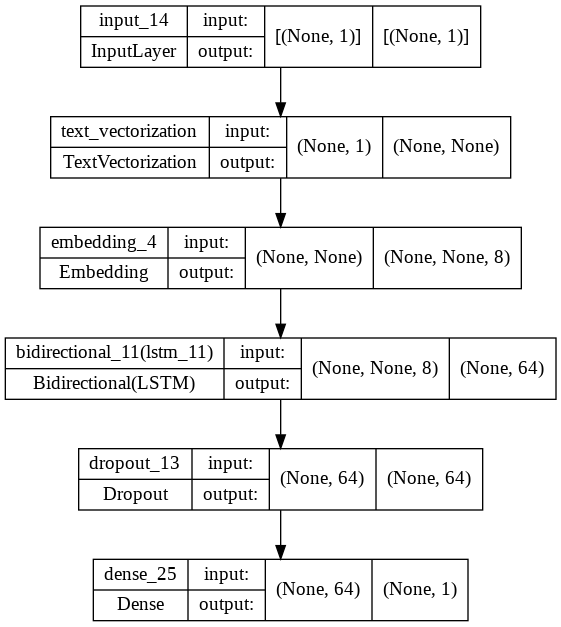

In [ ]:
#Model Using Bidirectional LSTM 
def build_model_embed():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    # Truncates after 600 tokens, and pads up to 600 tokens for shorter reviews.
    # Mask zero means it will skip 0 tokens and will not pass them on.
    embedding = keras.layers.Embedding(input_dim=2000,output_dim=8,input_length=600, mask_zero=True)(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs,outputs)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_embed = build_model_embed()

keras.utils.plot_model(model_embed, show_shapes=True)

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 25
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_embed()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [ ]:
model_embed = build_model_embed()
model_embed.fit(data_train,labels_train,epochs=9,batch_size=25)

test_acc = model_embed.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

##Clustering

##Sentiment analysis

##Word Cloud